# Graduation Lab (Week 6)

## Instructions:

Let's build a kNN model using the college completion data from last week. 
The data is messy and you have a degrees of freedom problem, as in, we have too many features.  

You've done most of the hard work already, so you should be ready to move forward with building your model. 

1. Use the question/target variable you submitted from last week and build a model to answer the question you created for this dataset. 

2. Build and optimize a kNN model to predict your target variable. Meaning use the tune set to select the correct k value. 

3. Experiment with the threshold function, what happens at higher and lower thresholds. Document what you see in comments. 

4. Evaluate the results using the confusion matrix (at the default threshold). Then talk through your question, summarize what concerns or positive elements do you have about the model? 

Bonus: Adjust the function that selects k to output on Specificity instead of Accuracy

### Example of how I cleaned the data

readme for the dataset - https://data.world/databeats/college-completion/workspace/file?filename=README.txt

In [1]:
import pandas as pd

grad_data = pd.read_csv('https://query.data.world/s/qpi2ltkz23yp2fcaz4jmlrskjx5qnp', encoding="cp1252")
# the encoding part here is important to properly read the data! It doesn't apply to ALL csv files read from the web,
# but it was necessary here.
grad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   unitid                                3798 non-null   int64  
 1   chronname                             3798 non-null   object 
 2   city                                  3798 non-null   object 
 3   state                                 3798 non-null   object 
 4   level                                 3798 non-null   object 
 5   control                               3798 non-null   object 
 6   basic                                 3798 non-null   object 
 7   hbcu                                  94 non-null     object 
 8   flagship                              50 non-null     object 
 9   long_x                                3798 non-null   float64
 10  lat_y                                 3798 non-null   float64
 11  site             

In [2]:
# We have a lot of data! A lot of these have many missing values or are otherwise not useful.

to_drop = list(range(39, 56))
to_drop.extend([27, 9, 10, 11, 28, 36, 60, 56])

In [3]:
grad_data1 = grad_data.drop(grad_data.columns[to_drop], axis=1)
grad_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unitid                  3798 non-null   int64  
 1   chronname               3798 non-null   object 
 2   city                    3798 non-null   object 
 3   state                   3798 non-null   object 
 4   level                   3798 non-null   object 
 5   control                 3798 non-null   object 
 6   basic                   3798 non-null   object 
 7   hbcu                    94 non-null     object 
 8   flagship                50 non-null     object 
 9   student_count           3798 non-null   int64  
 10  awards_per_value        3798 non-null   float64
 11  awards_per_state_value  3798 non-null   float64
 12  awards_per_natl_value   3798 non-null   float64
 13  exp_award_value         3798 non-null   int64  
 14  exp_award_state_value   3798 non-null   

In [4]:
# drop even more data that doesn't look predictive
drop_more = [0,2,3,6,8,11,12,14,15,18,21,23,29,32,33,34,35]
grad_data2 = grad_data1.drop(grad_data1.columns[drop_more], axis=1)
grad_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   chronname             3798 non-null   object 
 1   level                 3798 non-null   object 
 2   control               3798 non-null   object 
 3   hbcu                  94 non-null     object 
 4   student_count         3798 non-null   int64  
 5   awards_per_value      3798 non-null   float64
 6   exp_award_value       3798 non-null   int64  
 7   exp_award_percentile  3798 non-null   int64  
 8   ft_pct                3794 non-null   float64
 9   fte_percentile        3798 non-null   int64  
 10  med_sat_value         1337 non-null   float64
 11  aid_value             3797 non-null   float64
 12  grad_100_value        3467 non-null   float64
 13  grad_100_percentile   3467 non-null   float64
 14  grad_150_value        3467 non-null   float64
 15  grad_150_percentile  

In [5]:
grad_data2.head()

,chronname,level,control,hbcu,student_count,awards_per_value,exp_award_value,exp_award_percentile,ft_pct,fte_percentile,med_sat_value,aid_value,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,retain_value,ft_fac_value,cohort_size
0,Alabama A&M University,4-year,Public,X,4051,14.2,105331,90,93.8,33,823.0,7142.0,10.0,15.0,29.1,14.0,71.2,63.1,82.8,882.0
1,University of Alabama at Birmingham,4-year,Public,NaN,11502,20.9,136546,97,72.7,67,1146.0,6088.0,29.4,67.0,53.5,66.0,35.1,80.2,92.4,1376.0
2,Amridge University,4-year,Private not-for-profit,NaN,322,29.9,58414,30,62.7,12,NaN,2540.0,0.0,0.0,66.7,72.0,68.4,37.5,67.2,3.0
3,University of Alabama at Huntsville,4-year,Public,NaN,5696,20.9,64418,61,74.4,40,1180.0,6647.0,16.5,34.0,48.4,54.0,32.8,81.0,65.5,759.0
4,Alabama State University,4-year,Public,X,5356,11.6,132407,96,91.0,41,830.0,7256.0,8.8,11.0,25.2,9.0,82.7,62.2,67.0,1351.0


In [6]:
import numpy as np
grad_data2.replace('NULL', np.nan, inplace=True)

In [7]:
grad_data2['hbcu'] = [1 if grad_data2['hbcu'][i]=='X' else 0 for i in range(len(grad_data2['hbcu']))]
grad_data2['hbcu'].value_counts()

hbcu
0    3704
1      94
Name: count, dtype: int64

In [8]:
grad_data2['hbcu'] = grad_data2.hbcu.astype('category')

In [9]:
# convert more variables to factors
grad_data2[['level', 'control']] = grad_data2[['level', 'control']].astype('category')

In [10]:
# In R, we convert vals to numbers, but they already are in this import
grad_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   chronname             3798 non-null   object  
 1   level                 3798 non-null   category
 2   control               3798 non-null   category
 3   hbcu                  3798 non-null   category
 4   student_count         3798 non-null   int64   
 5   awards_per_value      3798 non-null   float64 
 6   exp_award_value       3798 non-null   int64   
 7   exp_award_percentile  3798 non-null   int64   
 8   ft_pct                3794 non-null   float64 
 9   fte_percentile        3798 non-null   int64   
 10  med_sat_value         1337 non-null   float64 
 11  aid_value             3797 non-null   float64 
 12  grad_100_value        3467 non-null   float64 
 13  grad_100_percentile   3467 non-null   float64 
 14  grad_150_value        3467 non-null   float64 
 15  grad

/home/wloving77/Githubs/Fall2023/Fall2023Classes/foundations_of_machine_learning/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wloving77/Githubs/Fall2023/Fall2023Classes/foundations_of_machine_learning/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wloving77/Githubs/Fall2023/Fall2023Classes/foundations_of_machine_learning/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wloving77/Git

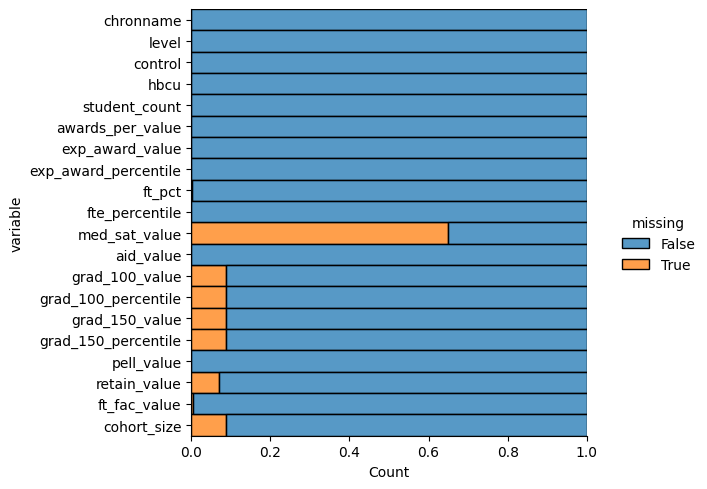

In [11]:
# check missing data
import seaborn as sns

sns.displot(
    data=grad_data2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [12]:
#let's drop med_stat_value then delete the rest of the NA rows
grad_data2 = grad_data2.drop(grad_data[['med_sat_value']], axis=1)
grad_data2.dropna(axis = 0, how = 'any', inplace = True)

/home/wloving77/Githubs/Fall2023/Fall2023Classes/foundations_of_machine_learning/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wloving77/Githubs/Fall2023/Fall2023Classes/foundations_of_machine_learning/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wloving77/Githubs/Fall2023/Fall2023Classes/foundations_of_machine_learning/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/wloving77/Git

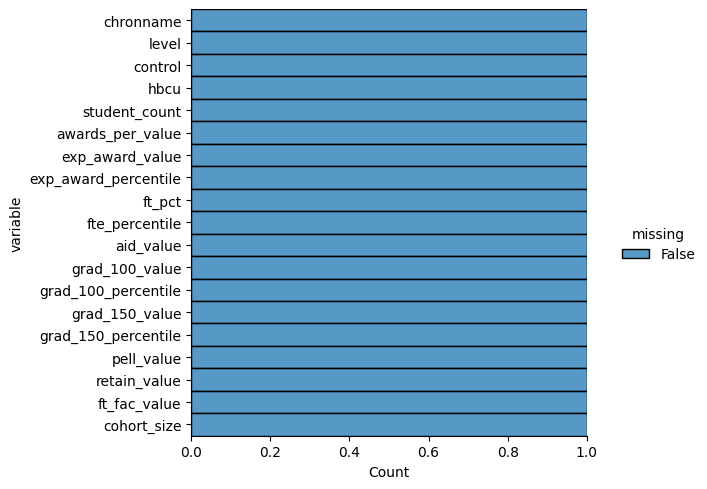

In [13]:
sns.displot(
    data=grad_data2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [15]:
grad_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3371 entries, 0 to 3796
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   chronname             3371 non-null   object  
 1   level                 3371 non-null   category
 2   control               3371 non-null   category
 3   hbcu                  3371 non-null   category
 4   student_count         3371 non-null   int64   
 5   awards_per_value      3371 non-null   float64 
 6   exp_award_value       3371 non-null   int64   
 7   exp_award_percentile  3371 non-null   int64   
 8   ft_pct                3371 non-null   float64 
 9   fte_percentile        3371 non-null   int64   
 10  aid_value             3371 non-null   float64 
 11  grad_100_value        3371 non-null   float64 
 12  grad_100_percentile   3371 non-null   float64 
 13  grad_150_value        3371 non-null   float64 
 14  grad_150_percentile   3371 non-null   float64 
 15  pell_valu

# My Work Below:

1. We One-Hot-Encode Categoricals and Standard Scale the Numericals:

In [45]:
categorical_variables = grad_data2.select_dtypes(include = ['category', 'object']).columns

data_encoded = pd.get_dummies(grad_data2[categorical_variables], columns=categorical_variables)
data_encoded[data_encoded.columns] = data_encoded[data_encoded.columns].astype(int)

data_numerical = grad_data2.drop(columns=categorical_variables)

for col in data_numerical.columns:
    if col != "aid_value":
        data_numerical[col] = (data_numerical[col] - data_numerical[col].mean()) / data_numerical[col].std() 

df_final = pd.concat([data_numerical, data_encoded], axis=1)

df_final.head()

,student_count,awards_per_value,exp_award_value,exp_award_percentile,ft_pct,fte_percentile,aid_value,grad_100_value,grad_100_percentile,grad_150_value,...,chronname_Yuba College,chronname_Zane State College,chronname_Zion Bible College,level_2-year,level_4-year,control_Private for-profit,control_Private not-for-profit,control_Public,hbcu_0,hbcu_1
0,-0.097612,-0.847543,0.331727,1.328685,0.885552,-0.639956,7142.0,-0.802249,-1.057726,-0.595573,...,0,0,0,0,1,0,0,1,0,1
1,0.895493,-0.180274,0.607714,1.572671,0.042923,0.539063,6088.0,0.033635,0.654302,0.457379,...,0,0,0,0,1,0,0,1,1,0
2,-0.594631,0.716058,-0.083088,-0.762627,-0.356427,-1.368174,2540.0,-1.233117,-1.551580,1.027009,...,0,0,0,0,1,0,1,0,1,0
3,0.121641,-0.180274,-0.030004,0.317884,0.110812,-0.397217,6647.0,-0.522185,-0.432177,0.237295,...,0,0,0,0,1,0,0,1,1,0
4,0.076324,-1.106484,0.571119,1.537816,0.773734,-0.362540,7256.0,-0.853953,-1.189420,-0.763873,...,0,0,0,0,1,0,0,1,0,1


In [46]:
from sklearn.model_selection import train_test_split


y = df_final['aid_value']
X = df_final.drop(columns='aid_value')


X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [49]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)

model.fit(X_train, y_train)

KNeighborsRegressor()

# Regression Code:

In [53]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)

np.sqrt(mean_squared_error(predictions, y_test))


3271.5012548709533

In [58]:
from sklearn.model_selection import GridSearchCV


model = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 15, 17, 21],       # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting method
    'p': [1, 2]                      # Power parameter for distance calculation (1: Manhattan, 2: Euclidean)
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions with the best estimator
predictions = best_estimator.predict(X_test)

In [57]:
np.sqrt(mean_squared_error(predictions, y_test))

3136.6150368226654

# Classifier:

In [78]:
from sklearn.neighbors import KNeighborsClassifier

categorical_variables = grad_data2.select_dtypes(include = ['category', 'object']).columns

categorical_variables = [x for x in categorical_variables if x != "level"]

data_encoded = pd.get_dummies(grad_data2[categorical_variables], columns=categorical_variables)
data_encoded[data_encoded.columns] = data_encoded[data_encoded.columns].astype(int)

data_numerical = grad_data2.drop(columns=categorical_variables)

for col in data_numerical.columns:
    if col != "level":
        data_numerical[col] = (data_numerical[col] - data_numerical[col].mean()) / data_numerical[col].std() 

df_final = pd.concat([data_numerical, data_encoded], axis=1)

df_final.head()


,level,student_count,awards_per_value,exp_award_value,exp_award_percentile,ft_pct,fte_percentile,aid_value,grad_100_value,grad_100_percentile,...,chronname_Yorktowne Business Institute,chronname_Youngstown State University,chronname_Yuba College,chronname_Zane State College,chronname_Zion Bible College,control_Private for-profit,control_Private not-for-profit,control_Public,hbcu_0,hbcu_1
0,4-year,-0.097612,-0.847543,0.331727,1.328685,0.885552,-0.639956,-0.182128,-0.802249,-1.057726,...,0,0,0,0,0,0,0,1,0,1
1,4-year,0.895493,-0.180274,0.607714,1.572671,0.042923,0.539063,-0.340360,0.033635,0.654302,...,0,0,0,0,0,0,0,1,1,0
2,4-year,-0.594631,0.716058,-0.083088,-0.762627,-0.356427,-1.368174,-0.873003,-1.233117,-1.551580,...,0,0,0,0,0,0,1,0,1,0
3,4-year,0.121641,-0.180274,-0.030004,0.317884,0.110812,-0.397217,-0.256440,-0.522185,-0.432177,...,0,0,0,0,0,0,0,1,1,0
4,4-year,0.076324,-1.106484,0.571119,1.537816,0.773734,-0.362540,-0.165013,-0.853953,-1.189420,...,0,0,0,0,0,0,0,1,0,1


In [83]:

y = df_final['level']
X = df_final.drop(columns='level')

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8)

In [87]:
neighbors_classifier = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 21],       # Number of neighbors
    'weights': ['distance'],  # Weighting method
    'p': [1, 2]                      # Power parameter for distance calculation (1: Manhattan, 2: Euclidean)
}


grid_search = GridSearchCV(estimator=neighbors_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [88]:
best_estimator

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [91]:
model = KNeighborsClassifier(n_neighbors=3, p=1, weights="distance")

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

custom_threshold = 0.60

conf_matrix = confusion_matrix(y_pred, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = model.classes_)

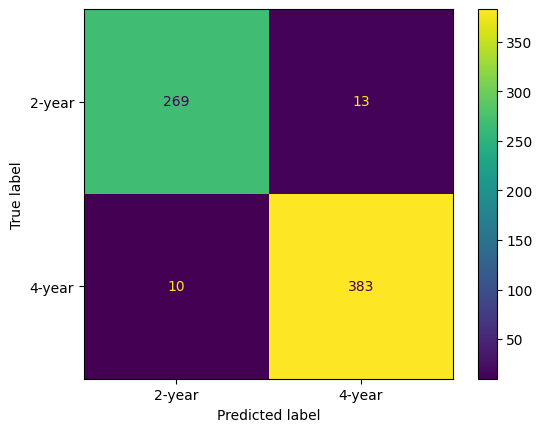

In [112]:
disp.plot()